In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from datetime import datetime
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style("whitegrid")

In [3]:
noshows = pd.read_csv('dataset/noshowappointments/KaggleV2-May-2016.csv')
noshows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Exploration

In [4]:
noshows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
noshows.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
noshows.groupby('Neighbourhood').size()

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
BELA VISTA             1907
BENTO FERREIRA          858
BOA VISTA               312
BONFIM                 2773
CARATOÍRA              2565
CENTRO                 3334
COMDUSA                 310
CONQUISTA               849
CONSOLAÇÃO             1376
CRUZAMENTO             1398
DA PENHA               2217
DE LOURDES              305
DO CABRAL               560
DO MOSCOSO              413
DO QUADRO               849
ENSEADA DO SUÁ          235
ESTRELINHA              538
FONTE GRANDE            682
FORTE SÃO JOÃO         1889
FRADINHOS               258
GOIABEIRAS              700
GRANDE VITÓRIA         1071
GURIGICA               2018
HORTO                   175
ILHA DAS CAIEIRAS      1071
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          802
PIEDADE                 452
PONTAL DE CAMBURI        69
PRAIA 

In [7]:
noshows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Age = -1 ??  
Hipertension --> Hypertension  
Handcap --> Handicap/Handicapped

WaitTime = AppointmentDay - ScheduledDay  
GenderB --> 0:M, 1:F  
No-showB --> 0:No, 1:Yes  
day_of_week --> AppointmentDay: 1-7

# Data wrangling

In [8]:
# rename columns
noshows.rename(columns = {'Hipertension':'Hypertension',
                         'Handcap': 'Handicap',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

noshows.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
# Convert types
noshows.PatientId =  noshows.PatientId.apply(np.int64)
noshows.ScheduledDay = noshows.ScheduledDay.apply(np.datetime64)
noshows.AppointmentDay = noshows.AppointmentDay.apply(np.datetime64)

noshows['WaitTime'] = (noshows.AppointmentDay - noshows.ScheduledDay).dt.days
noshows['No-showB']= noshows['No-show'].apply(lambda x: 0 if x =="No" else 1)
noshows['GenderB'] = noshows['Gender'].apply(lambda x: 0 if x =="M" else 1)
noshows['day_of_week'] = noshows.AppointmentDay.dt.weekday_name
noshows['dayofweek'] = noshows.AppointmentDay.dt.weekday
noshows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitTime,No-showB,GenderB,day_of_week,dayofweek
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,0,1,Friday,4
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,0,0,Friday,4
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,0,1,Friday,4
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,0,1,Friday,4
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,0,1,Friday,4
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,1,0,1,Friday,4
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,1,1,Friday,4
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,1,1,Friday,4
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,-1,0,1,Friday,4
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,1,0,1,Friday,4


In [10]:
noshows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitTime,No-showB,GenderB,dayofweek
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,0.201933,0.649977,1.858243
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,0.401444,0.476979,1.371672
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,1.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000,1.000000,5.000000


In [11]:
noshows[noshows['dayofweek'] == 5].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitTime,No-showB,GenderB,day_of_week,dayofweek
72295,9656743739937,5647188,F,2016-05-02 13:08:18,2016-05-14,60,SANTO ANTÔNIO,0,0,0,0,0,1,No,11,0,1,Saturday,5
72296,261246839673951,5692771,M,2016-05-12 16:13:24,2016-05-14,56,CARATOÍRA,0,0,0,0,0,0,Yes,1,1,0,Saturday,5
72297,62197183951413,5668696,F,2016-05-06 09:35:30,2016-05-14,27,CARATOÍRA,1,0,0,0,0,1,No,7,0,1,Saturday,5
72298,1715927721832,5646878,M,2016-05-02 12:02:42,2016-05-14,75,CARATOÍRA,0,1,1,0,0,0,No,11,0,0,Saturday,5
72299,61824462897921,5673055,F,2016-05-09 08:50:55,2016-05-14,67,CARATOÍRA,0,0,0,0,0,1,No,4,0,1,Saturday,5


In [12]:
# noshows[noshows['Handicap'] == 0]['Handicap'].value_counts()
# noshows[noshows['Handicap'] > 0]['Handicap'].value_counts()
noshows['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [13]:
noshows['isHandcap'] = noshows['Handicap'].apply(lambda x: 1 if x != 0 else x)
noshows['isHandcap'].value_counts()

0    108286
1      2241
Name: isHandcap, dtype: int64

In [14]:
noshows[noshows['Age'] < 0]['Age'].value_counts()

-1    1
Name: Age, dtype: int64

In [15]:
noshows[noshows['Age'] > 100]['Age'].value_counts()

115    5
102    2
Name: Age, dtype: int64

In [16]:
# filter outlier, we are interested only 0 <= AGE <= 100 
noshows = noshows[noshows.Age >= 0]
noshows = noshows[noshows.Age <= 100]

In [17]:
def ageRange (x):
    if x < 0 : return 0               
    elif x >= 0 and x < 10 : return 1  
    elif x >=10 and x < 20 : return 2  
    elif x >=20 and x < 30 : return 3 
    elif x >=30 and x < 40 : return 4 
    elif x >=40 and x < 50 : return 5 
    elif x >=50 and x < 60 : return 6  
    elif x >=60 and x < 70 : return 7 
    elif x >=70 and x < 80 : return 8 
    elif x >=80 and x < 90 : return 9  
    else: return 10                    

noshows['AgeClass']= noshows['Age'].apply(ageRange)

In [18]:
## Recurrent checking
#for i, noshow in noshows.iterrows():
#    noshows.loc[i, "Recurrent"] = noshows[(noshows.PatientId == noshow.PatientId) & (noshows.AppointmentDay <= noshow.ScheduledDay) & (noshows['No-show'] == 1)]['No-show'].count()

In [19]:
noshows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitTime,No-showB,GenderB,dayofweek,isHandcap,AgeClass
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040,9.183887,0.201920,0.649952,1.858251,0.020241,4.275907
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878,15.255169,0.401435,0.476987,1.371657,0.140824,2.295202
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,4.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,1.000000,3.000000,0.000000,6.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000,1.000000,5.000000,1.000000,10.000000


In [20]:
noshows[noshows['WaitTime'] < 0]['WaitTime'].value_counts()

-1    38560
-2        4
-7        1
Name: WaitTime, dtype: int64

In [21]:
###################################
# Method1
# ## filter poor data quality, we are interested only WaitTime > 0
# ## but there are many data that WaitTime == -1 (about 25% to 30%) so keep
# #noshows = noshows[noshows.WaitTime >= 0]
# noshows = noshows[noshows.WaitTime >= -1]

###################################
# Method2 expect: Users put alternate data then absolute(WaitTime)
from math import fabs
noshows.WaitTime =  noshows.WaitTime.apply(fabs)

In [22]:
noshows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitTime,No-showB,GenderB,dayofweek,isHandcap,AgeClass
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040,9.881957,0.201920,0.649952,1.858251,0.020241,4.275907
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878,14.812521,0.401435,0.476987,1.371657,0.140824,2.295202
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,4.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,1.000000,3.000000,0.000000,6.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,1.000000,1.000000,5.000000,1.000000,10.000000


In [23]:
noshows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 21 columns):
PatientId         110519 non-null int64
AppointmentID     110519 non-null int64
Gender            110519 non-null object
ScheduledDay      110519 non-null datetime64[ns]
AppointmentDay    110519 non-null datetime64[ns]
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
No-show           110519 non-null object
WaitTime          110519 non-null float64
No-showB          110519 non-null int64
GenderB           110519 non-null int64
day_of_week       110519 non-null object
dayofweek         110519 non-null int64
isHandcap         110519 non-null int64
AgeClass          110519 non-null int64
dtypes: datetime64[ns](2)

In [24]:
bandpass_filterlist = ['No-showB', 'PatientId', 'GenderB', 'Age', 'AgeClass'
                       , 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism'
                       , 'Handicap', 'isHandcap', 'SMS_received', 'WaitTime'
                       , 'day_of_week', 'dayofweek', 
                      ]
noshows_data = noshows.loc[:, bandpass_filterlist]
noshows_data.head()

,No-showB,PatientId,GenderB,Age,AgeClass,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,isHandcap,SMS_received,WaitTime,day_of_week,dayofweek
0,0,29872499824296,1,62,7,0,1,0,0,0,0,0,1.0,Friday,4
1,0,558997776694438,0,56,6,0,0,0,0,0,0,0,1.0,Friday,4
2,0,4262962299951,1,62,7,0,0,0,0,0,0,0,1.0,Friday,4
3,0,867951213174,1,8,1,0,0,0,0,0,0,0,1.0,Friday,4
4,0,8841186448183,1,56,6,0,1,1,0,0,0,0,1.0,Friday,4


# Visualization

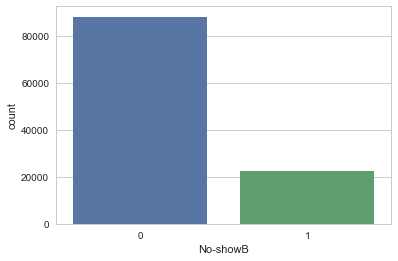

In [25]:
target = sns.countplot(x="No-showB", data=noshows_data)

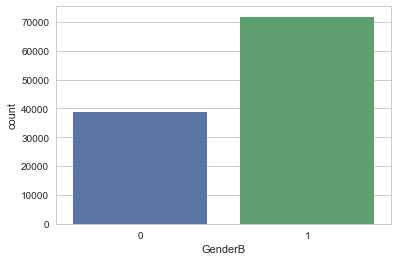

In [26]:
sns.countplot(x="GenderB", data=noshows_data)

No-showB
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

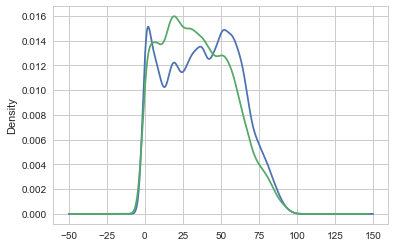

In [27]:
noshows_data.groupby('No-showB').Age.plot(kind='kde')

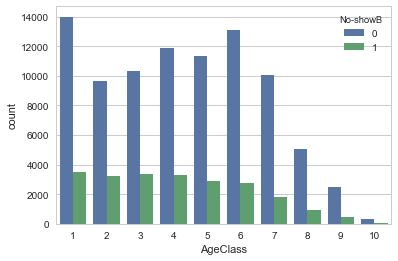

In [28]:
sns.countplot(x="AgeClass", hue = "No-showB", data=noshows_data)

# Model

In [31]:
y = noshows_data.loc[:, 'No-showB'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
feature_list = ['GenderB'
                , 'AgeClass'
                , 'Scholarship'
                , 'Hypertension'
                , 'Diabetes'
                , 'Alcoholism'
                , 'Handicap'
                , 'isHandcap'
                , 'SMS_received'
                , 'WaitTime'
                #, 'dayofweek' ## I forgot how to handle with data that is not quantity
                ]

In [33]:
feature_list = ['isHandcap'
                , 'WaitTime'
                ]

In [34]:
feature_list = ['Hypertension'
                , 'Diabetes'
                , 'Alcoholism'
                , 'isHandcap' 
                , 'WaitTime'
                ]

In [35]:
feature_list = ['GenderB'
                , 'AgeClass'
                , 'Scholarship'
                , 'Hypertension'
                , 'Diabetes'
                , 'Alcoholism'
                , 'isHandcap'
                , 'WaitTime'
                ]

In [36]:
X = noshows_data.loc[:, feature_list]
X.head()

,GenderB,AgeClass,Scholarship,Hypertension,Diabetes,Alcoholism,isHandcap,WaitTime
0,1,7,0,1,0,0,0,1.0
1,0,6,0,0,0,0,0,1.0
2,1,7,0,0,0,0,0,1.0
3,1,1,0,0,0,0,0,1.0
4,1,6,0,1,1,0,0,1.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

#### LogisticRegression

In [38]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
LogReg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Test: predict train data
y_pred = LogReg.predict(X_train)

# evaluate score
print(f'Accuracy: {(y_train==y_pred).mean() * 100} %')
print(f'Accuracy: {accuracy_score(y_train,y_pred) * 100} %')
print(classification_report(y_train, y_pred))

Accuracy: 79.47856210333106 %
Accuracy: 79.47856210333106 %
             precision    recall  f1-score   support

          0       0.80      0.99      0.89     61742
          1       0.32      0.01      0.03     15621

avg / total       0.70      0.79      0.71     77363



In [41]:
confusion_matrix(y_train, y_pred)

array([[61255,   487],
       [15389,   232]])

In [42]:
# Test: predict test data
y_pred = LogReg.predict(X_test)
# evaluate score
print(f'Accuracy: {(y_test==y_pred).mean() * 100} %')
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100} %')
print(classification_report(y_test, y_pred))

Accuracy: 79.55422849559656 %
Accuracy: 79.55422849559656 %
             precision    recall  f1-score   support

          0       0.80      0.99      0.89     26461
          1       0.37      0.02      0.03      6695

avg / total       0.71      0.80      0.71     33156



In [43]:
confusion_matrix(y_test, y_pred)

array([[26258,   203],
       [ 6576,   119]])

In [44]:
target_names = ['class 0', 'class 1']

def classifaction_report_csv(name, report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('     ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(name, index = False)
    
classification_report(y_test, y_pred, target_names=target_names)    
report = classification_report(y_test, y_pred, target_names=target_names)

# save to csv
classifaction_report_csv('report.csv', report)    


### naive_bayes: MultinomialNB

In [49]:
from sklearn.naive_bayes import MultinomialNB
clf =  MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_train)

# evaluate score
print(f'Accuracy: {(y_train==y_pred).mean() * 100} %')
print(f'Accuracy: {accuracy_score(y_train,y_pred) * 100} %')
print(classification_report(y_train, y_pred))

Accuracy: 73.10342153225702 %
Accuracy: 73.10342153225702 %
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     61742
          1       0.34      0.35      0.34     15621

avg / total       0.73      0.73      0.73     77363



In [51]:
confusion_matrix(y_train, y_pred)

array([[51096, 10646],
       [10162,  5459]])

In [52]:
# Test: predict test data
y_pred = clf.predict(X_test)
# evaluate score
print(f'Accuracy: {(y_test==y_pred).mean() * 100} %')
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100} %')
print(classification_report(y_test, y_pred))


Accuracy: 73.28387018940765 %
Accuracy: 73.28387018940765 %
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     26461
          1       0.34      0.35      0.34      6695

avg / total       0.73      0.73      0.73     33156



In [53]:
confusion_matrix(y_test, y_pred)

array([[21987,  4474],
       [ 4384,  2311]])